In [165]:
!pip install pandas scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.9 MB/s eta 0:00:00:00:0100:01


In [94]:
import boto3
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Initialize a boto3 client with your AWS credentials
# Access key ID & Secret access key shared in your mail
s3_client = boto3.client(
    's3',
    aws_access_key_id='',
    aws_secret_access_key=''
)

### Read  CSV file from S3
# Specify your  AWS S3 bucket  name
bucket_name = 'datathon-3.0'
read_file_name = 'Q2-new-products.csv'

# Get the object from the bucket
response = s3_client.get_object(Bucket=bucket_name, Key=read_file_name)

# Read the object (which is in bytes) into a DataFrame
with open(read_file_name, 'wb') as fp:
    fp.write(BytesIO(response['Body'].read()).getbuffer())

df = pd.read_csv(read_file_name)
df.head()


,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [108]:
product_df = pd.read_csv('TBL_PRODUCT_CATALOGUE.csv')
product_df['UNIT_PRICE'] = product_df['PACK_PRICE'] / product_df['DATA_VOL_GB']
product_df.head()

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250
1,2,Standard,Cash,328,30,24.0,Continue,13.666667
2,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333
3,4,Premium,Cash,558,15,64.0,Discontinue,8.718750
4,5,Premium,Cash,300,7,20.0,New,15.000000


In [3]:
purchase_df = pd.read_csv('TBL_PACK_PURCHASE.csv')
purchase_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS
0,20190703,CD20EDFC8000A7,1756,1
1,20190522,CD1F932E0A89C1,1524,1
2,20190522,CD201715F62164,1524,1
3,20190623,CD1F7B4DD83C5B,1524,1
4,20190523,CD1F7BD12742B8,1524,1


In [4]:
consumption_df = pd.read_csv('TBL_DATA_CONSUMPTION.csv')
print(len(consumption_df))
consumption_df.head()

23375373


,EVENT_DATE,CUSTOMER_ID,TOTAL_VOLUME_GB,VOLUME_GB_IN_HIGH_BANDWIDTH
0,20190914,CD1F7653F6BE80,14.2695,14.2695
1,20190916,CD1F7653F6BE80,22.2891,22.2891
2,20190716,CD1F7653F6BE80,26.3086,26.3086
3,20190906,CD1F7653F6BE80,6.8477,6.7813
4,20190921,CD1F7653F6BE80,15.1406,15.1406


In [5]:
test_df = pd.read_csv('Q2-new-products.csv')
test_df.head()

,PACK_ID
0,352
1,1735
2,179
3,1434
4,426


In [109]:
purchase_product_df = pd.merge(purchase_df, product_df, how='inner', on='PACK_ID')
purchase_product_df['EVENT_DATE'] = pd.to_datetime(purchase_product_df['EVENT_DATE'], format='%Y%m%d')
purchase_product_df.sort_values(by='EVENT_DATE', inplace=True, ignore_index=True)
purchase_product_df['TOTAL_DATA_VOL_GB'] = purchase_product_df['DATA_VOL_GB'] * purchase_product_df['HITS']
purchase_product_df.head()

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,TOTAL_DATA_VOL_GB
0,2019-05-21,CD218554C71203,278,1,Premium,Cash,356,7,56.0,Discontinue,6.357143,56.0
1,2019-05-21,CD20F0D0031916,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
2,2019-05-21,CD20F3F3132F06,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
3,2019-05-21,CD212DD33D5C02,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0
4,2019-05-21,CD212DD6E5B84B,1692,1,Premium,Cash,114,3,6.0,Discontinue,19.000000,6.0


In [7]:
purchase_product_df['PRODUCT_STATUS'].value_counts()

PRODUCT_STATUS
Discontinue    1084280
Continue        124430
Name: count, dtype: int64

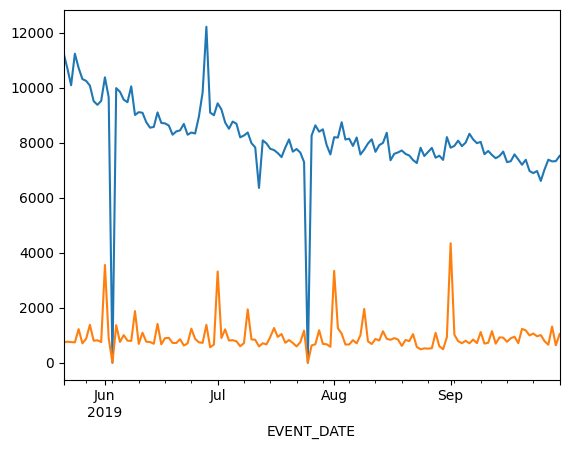

In [80]:
discontinued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Discontinue']
continued_products_df = purchase_product_df[purchase_product_df['PRODUCT_STATUS'] == 'Continue']
daily_hits_discontinued = discontinued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_continued = continued_products_df.resample('D', on='EVENT_DATE')['HITS'].sum()
daily_hits_discontinued.plot()
daily_hits_continued.plot()
plt.show()

In [82]:
daily_hits_discontinued[daily_hits_discontinued['HITS'] == 0]

EVENT_DATE
2019-05-21    11261
2019-05-22    10707
2019-05-23    10091
2019-05-24    11238
2019-05-25    10719
              ...  
2019-09-26     7031
2019-09-27     7383
2019-09-28     7322
2019-09-29     7331
2019-09-30     7520
Freq: D, Name: HITS, Length: 133, dtype: int64

In [9]:
purchase_product_df_filtered = pd.merge(test_df, purchase_product_df, how='inner', on='PACK_ID')
purchase_product_df_filtered

,PACK_ID,EVENT_DATE,CUSTOMER_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,TOTAL_DATA_VOL_GB


In [160]:
test_product_df = pd.merge(test_df, product_df, how='inner', on='PACK_ID')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
1,1735,Premium,Digital Wallets,396,7,72.0,New,5.500000
2,179,Premium,Mobile Walet,336,7,32.0,New,10.500000
3,1434,Premium,Mobile Walet,136,7,8.0,New,17.000000
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
9,801,Premium,Digital Wallets,1196,30,160.0,New,7.475000


In [13]:
latest_date_of_purchase = purchase_product_df.iloc[-1]['EVENT_DATE']
latest_date_of_purchase

Timestamp('2019-09-30 00:00:00')

In [14]:
purchase_product_df['CUSTOMER_ID'].nunique()

342635

In [15]:
customer_consumption = pd.merge(purchase_product_df[['EVENT_DATE', 'TOTAL_DATA_VOL_GB', '']])

KeyError: "[''] not in index"

In [50]:
purchase_product_df['SERVICE_TYPE'].value_counts()

SERVICE_TYPE
Premium     954953
Standard    253757
Name: count, dtype: int64

In [18]:
purchase_product_df_filtered = purchase_product_df[purchase_product_df['EVENT_DATE'] >= '2019-06-01']
purchase_product_df_filtered

,EVENT_DATE,CUSTOMER_ID,PACK_ID,HITS,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,TOTAL_DATA_VOL_GB
122168,2019-06-01,CD1F7EAD621D6C,1330,1,Standard,Digital Wallets,994,30,168.0,Discontinue,168.0
122169,2019-06-01,CD20FB9FF49100,812,1,Premium,Cash,296,7,24.0,Discontinue,24.0
122170,2019-06-01,CD214ADD83CFA9,622,1,Premium,Credit Card,110,30,4.0,Discontinue,4.0
122171,2019-06-01,CD211EBE8FE0DD,1181,1,Premium,Cash,994,30,100.0,Discontinue,100.0
122172,2019-06-01,CD20EE296E0002,2047,1,Premium,Cash,120,30,4.0,Continue,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1208705,2019-09-30,CD218220F4F1FA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,20.0
1208706,2019-09-30,CD216AE5C12541,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,20.0
1208707,2019-09-30,CD212E0040B457,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,20.0
1208708,2019-09-30,CD212FA9BD7AFA,1048,1,Premium,Digital Wallets,136,3,20.0,Discontinue,20.0


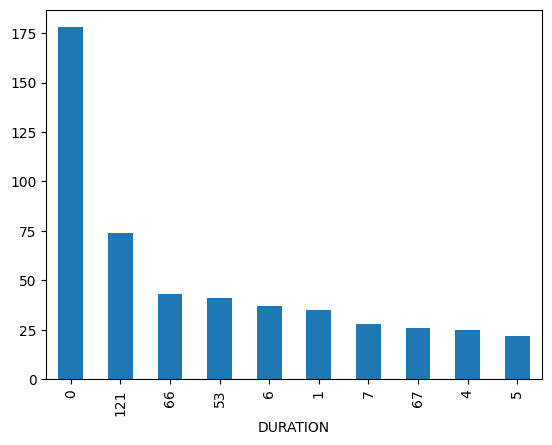

In [36]:
purchase_product_df_discontinued = purchase_product_df_filtered[purchase_product_df_filtered['PRODUCT_STATUS'] == 'Discontinue']
purchase_product_df_last_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='last')
purchase_product_df_first_dates = purchase_product_df_discontinued.drop_duplicates(subset=['PACK_ID'], keep='first')
purchase_product_df_dates = pd.merge(purchase_product_df_first_dates, purchase_product_df_last_dates, on='PACK_ID', how='inner')
purchase_product_df_dates = purchase_product_df_dates[['PACK_ID', 'EVENT_DATE_x', 'EVENT_DATE_y']].rename(columns={'EVENT_DATE_x': 'START_DATE', 'EVENT_DATE_y': 'LAST_DATE'})
purchase_product_df_dates['DURATION'] = (purchase_product_df_dates['LAST_DATE'] - purchase_product_df_dates['START_DATE']).dt.days
purchase_product_df_dates['DURATION'].value_counts()[:10].plot(kind='bar')
plt.show()

In [51]:
purchase_product_df_offer = purchase_product_df[purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_not_offer = purchase_product_df[~purchase_product_df['PACK_ID'].isin(purchase_product_df_dates[purchase_product_df_dates['DURATION'] == 0]['PACK_ID'])]
purchase_product_df_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,TOTAL_DATA_VOL_GB,UNIT_PRICE
count,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000
mean,0.3f,1035.670,1.043,437.188,19.135,52.431,56.787,47.211
min,0.3f,15.000,1.000,110.000,3.000,0.200,0.200,2.281
25%,0.3f,492.000,1.000,200.000,7.000,12.000,12.000,4.938
50%,0.3f,1095.000,1.000,328.000,30.000,36.000,36.000,7.478
75%,0.3f,1497.000,1.000,672.000,30.000,64.000,64.000,22.000
max,0.3f,2059.000,2.000,3064.000,30.000,440.000,880.000,4970.000
std,nan,607.113,0.203,351.621,12.232,60.544,79.303,257.655


In [52]:
purchase_product_df_not_offer.describe().map(lambda x: f"{x:0.3f}")

,EVENT_DATE,PACK_ID,HITS,PACK_PRICE,VALIDITY,DATA_VOL_GB,TOTAL_DATA_VOL_GB,UNIT_PRICE
count,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000,1208289.000
mean,0.3f,1024.542,1.004,422.142,14.132,54.923,55.022,18.066
min,0.3f,1.000,1.000,100.000,3.000,0.200,0.200,0.500
25%,0.3f,425.000,1.000,178.000,3.000,16.000,16.000,6.000
50%,0.3f,923.000,1.000,296.000,7.000,32.000,32.000,8.708
75%,0.3f,1671.000,1.000,558.000,30.000,80.000,80.000,13.600
max,0.3f,2057.000,13.000,6926.000,30.000,400.000,1440.000,4980.000
std,nan,646.206,0.073,351.503,11.924,56.348,56.603,131.793


In [55]:
purchase_product_df['DATA_VOL_GB'].nunique()

142

In [77]:
monthly_hits = purchase_product_df.groupby(['PACK_ID', purchase_product_df['EVENT_DATE'].dt.to_period('M')])['HITS'].sum().reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-08,18
1,1,2019-09,8
2,2,2019-05,12
3,2,2019-06,22
4,2,2019-07,23
...,...,...,...
3788,2054,2019-08,2
3789,2055,2019-08,15
3790,2056,2019-09,11
3791,2057,2019-09,5


In [78]:
date_range = pd.period_range(start='2019-06', end='2019-09', freq='M')
all_combinations = pd.MultiIndex.from_product([product_df['PACK_ID'].unique(), date_range], names=['PACK_ID', 'EVENT_DATE'])
all_combinations

In [79]:
monthly_hits = monthly_hits.set_index(['PACK_ID', 'EVENT_DATE']).reindex(all_combinations, fill_value=0).reset_index()
monthly_hits

,PACK_ID,EVENT_DATE,HITS
0,1,2019-06,0
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
4,2,2019-06,22
...,...,...,...
8191,2058,2019-09,0
8192,2059,2019-06,0
8193,2059,2019-07,1
8194,2059,2019-08,0


In [56]:
test_product_df = pd.merge(test_df, product_df, on='PACK_ID', how='inner')
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS
0,352,Premium,Mobile Walet,396,7,52.0,New
1,1735,Premium,Digital Wallets,396,7,72.0,New
2,179,Premium,Mobile Walet,336,7,32.0,New
3,1434,Premium,Mobile Walet,136,7,8.0,New
4,426,Premium,Mobile Walet,296,7,20.0,New
5,77,Premium,Mobile Walet,196,7,12.0,New
6,1856,Premium,Mobile Walet,196,7,10.0,New
7,150,Premium,Mobile Walet,1196,30,152.0,New
8,1563,Premium,Mobile Walet,996,30,80.0,New
9,801,Premium,Digital Wallets,1196,30,160.0,New


In [95]:
def mean_ignoring_initial_zeroes(data):
    # Convert data series to numpy array for easier manipulation
    values = data.to_numpy()
    # Find the first index where value is not zero using np.nonzero (returns a tuple hence [0][0])
    first_non_zero_index = np.nonzero(values)[0][0] if np.any(values != 0) else None
    # If there are non-zero values, calculate the mean from the first non-zero value onward
    if first_non_zero_index is not None:
        return values[first_non_zero_index:].mean()
    else:
        # Return NaN or 0 if all values are zero
        return 0


In [99]:
monthly_hits_discontinued = monthly_hits[monthly_hits['PACK_ID'].isin(product_df[product_df['PRODUCT_STATUS'] == 'Discontinue']['PACK_ID'])].reset_index(drop=True)
monthly_hits_discontinued = monthly_hits_discontinued[monthly_hits_discontinued['EVENT_DATE'].dt.month > 6]
monthly_hits_discontinued

,PACK_ID,EVENT_DATE,HITS
1,1,2019-07,0
2,1,2019-08,18
3,1,2019-09,8
5,3,2019-07,300
6,3,2019-08,322
...,...,...,...
5250,2057,2019-08,0
5251,2057,2019-09,5
5253,2059,2019-07,1
5254,2059,2019-08,0


In [101]:
product_means = monthly_hits_discontinued.groupby('PACK_ID')['HITS'].apply(mean_ignoring_initial_zeroes).reset_index(name='HITS_MEAN')
product_means

,PACK_ID,HITS_MEAN
0,1,13.000000
1,3,207.333333
2,4,1369.666667
3,6,810.000000
4,7,212.333333
...,...,...
1309,2054,2.000000
1310,2055,7.500000
1311,2056,11.000000
1312,2057,5.000000


In [153]:
product_df_aug = pd.merge(product_df, product_means, on='PACK_ID', how='inner')
product_df_aug

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,HITS_MEAN
0,1,Standard,Digital Wallets,1298,30,320.0,Discontinue,4.056250,13.000000
1,3,Premium,Mobile Walet,176,3,24.0,Discontinue,7.333333,207.333333
2,4,Premium,Cash,558,15,64.0,Discontinue,8.718750,1369.666667
3,6,Premium,Mobile Walet,196,3,28.0,Discontinue,7.000000,810.000000
4,7,Premium,Mobile Walet,898,30,44.0,Discontinue,20.409091,212.333333
...,...,...,...,...,...,...,...,...,...
1309,2054,Premium,Digital Wallets,258,7,40.0,Discontinue,6.450000,2.000000
1310,2055,Premium,Digital Wallets,180,7,68.0,Discontinue,2.647059,7.500000
1311,2056,Standard,Digital Wallets,178,3,52.0,Discontinue,3.423077,11.000000
1312,2057,Premium,Mobile Walet,996,30,176.0,Discontinue,5.659091,5.000000


In [118]:
product_df_aug['UNIT_PRICE'].value_counts()

UNIT_PRICE
5.000000     21
6.000000     15
4.500000     10
6.980000      9
4.000000      9
             ..
4.880000      1
35.000000     1
48.292683     1
8.900000      1
4.118750      1
Name: count, Length: 672, dtype: int64

In [ ]:
product_df_aug

In [119]:
test_product_df[~test_product_df['UNIT_PRICE'].isin(product_df_aug['UNIT_PRICE'])]

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE
0,352,Premium,Mobile Walet,396,7,52.0,New,7.615385
4,426,Premium,Mobile Walet,296,7,20.0,New,14.800000
5,77,Premium,Mobile Walet,196,7,12.0,New,16.333333
6,1856,Premium,Mobile Walet,196,7,10.0,New,19.600000
7,150,Premium,Mobile Walet,1196,30,152.0,New,7.868421
8,1563,Premium,Mobile Walet,996,30,80.0,New,12.450000
10,1424,Standard,Credit Card,394,30,60.0,New,6.566667
11,1587,Premium,Digital Wallets,996,30,88.0,New,11.318182
12,1576,Standard,Mobile Walet,178,7,14.0,New,12.714286
13,90,Standard,Mobile Walet,356,7,44.0,New,8.090909


In [124]:
comparison = pd.merge(product_df_aug, test_product_df, on='PACK_PRICE', how='inner')[['PACK_PRICE', 'VALIDITY_x', 'DATA_VOL_GB_x', 'UNIT_PRICE_x', 'VALIDITY_y', 'DATA_VOL_GB_y', 'UNIT_PRICE_y']]
comparison.head(20)

,PACK_PRICE,VALIDITY_x,DATA_VOL_GB_x,UNIT_PRICE_x,VALIDITY_y,DATA_VOL_GB_y,UNIT_PRICE_y
0,196,3,28.0,7.000000,7,12.0,16.333333
1,196,3,28.0,7.000000,7,10.0,19.600000
2,136,3,16.0,8.500000,7,8.0,17.000000
3,136,3,16.0,8.500000,7,8.0,17.000000
4,136,3,14.0,9.714286,7,8.0,17.000000
5,136,3,14.0,9.714286,7,8.0,17.000000
6,196,3,44.0,4.454545,7,12.0,16.333333
7,196,3,44.0,4.454545,7,10.0,19.600000
8,136,3,12.0,11.333333,7,8.0,17.000000
9,136,3,12.0,11.333333,7,8.0,17.000000


In [126]:
product_df_aug.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE,HITS_MEAN
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,1038.614916,498.922374,18.720700,67.810594,29.206608,214.328260
std,590.781090,432.004571,11.770091,70.649980,207.533989,831.317021
min,1.000000,100.000000,3.000000,0.200000,2.281250,0.000000
25%,531.500000,200.000000,7.000000,20.000000,5.273352,1.333333
50%,1053.000000,356.000000,30.000000,40.000000,7.333333,17.416667
75%,1548.750000,698.000000,30.000000,92.000000,12.900000,121.583333
max,2059.000000,6926.000000,30.000000,440.000000,4980.000000,12187.500000


In [127]:
test_product_df.describe()

,PACK_ID,PACK_PRICE,VALIDITY,DATA_VOL_GB,UNIT_PRICE
count,20.00000,20.000000,20.000000,20.00000,20.000000
mean,888.70000,535.100000,15.050000,66.20000,10.587632
std,714.60413,416.885432,11.255291,61.74617,4.404658
min,29.00000,136.000000,7.000000,8.00000,4.950000
25%,171.75000,196.000000,7.000000,18.50000,7.247917
50%,672.50000,375.000000,7.000000,48.00000,9.700000
75%,1578.75000,996.000000,30.000000,82.00000,13.235714
max,1856.00000,1396.000000,30.000000,220.00000,19.600000


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [154]:
label_encoders = {}
for column in ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']:
    le = LabelEncoder()
    product_df_aug[column] = le.fit_transform(product_df_aug[column])
    label_encoders[column] = le

product_df_aug['UNIT_PRICE'] = product_df_aug['UNIT_PRICE'].astype(float)

In [155]:
X = product_df_aug.drop(['HITS_MEAN', 'PACK_ID', 'PRODUCT_STATUS'], axis=1)
y = product_df_aug['HITS_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [156]:
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [157]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 883400.6884822805
R² Score: 0.14582276688286877


In [158]:
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 939.8939772560948


In [161]:
for column in ['SERVICE_TYPE', 'PAYMENT_METHOD', 'PACK_PRICE', 'VALIDITY', 'DATA_VOL_GB']:
    test_product_df[column] = label_encoders[column].transform(test_product_df[column])

# Ensure UNIT_PRICE is treated as a float (if not already)
test_product_df['UNIT_PRICE'] = test_product_df['UNIT_PRICE'].astype(float)

# Prepare features
X_new_test = test_product_df.drop(['PACK_ID', 'PRODUCT_STATUS'], axis=1)  # Assuming 'HITS_MEAN' should be dropped as it's the target

# Predict using the random forest regressor
y_new_pred = rf_regressor.predict(X_new_test)

# Optionally, you can add predictions back to the test dataframe
test_product_df['Predicted_HITS_MEAN'] = y_new_pred

print(test_product_df[['Predicted_HITS_MEAN']])

    Predicted_HITS_MEAN
0            808.704833
1            441.481167
2            774.359333
3           2104.143333
4           1882.624333
5            680.685333
6            706.588500
7           1254.126000
8            636.903833
9            370.579333
10           310.651333
11           727.602500
12           394.320667
13           828.221167
14           111.679833
15           234.106000
16           274.914167
17           115.517833
18          1009.834500
19           161.438667


In [162]:
test_product_df

,PACK_ID,SERVICE_TYPE,PAYMENT_METHOD,PACK_PRICE,VALIDITY,DATA_VOL_GB,PRODUCT_STATUS,UNIT_PRICE,Predicted_HITS_MEAN
0,352,0,3,94,1,62,New,7.615385,808.704833
1,1735,0,2,94,1,73,New,5.500000,441.481167
2,179,0,3,74,1,46,New,10.500000,774.359333
3,1434,0,3,12,1,18,New,17.000000,2104.143333
4,426,0,3,65,1,34,New,14.800000,1882.624333
5,77,0,3,32,1,22,New,16.333333,680.685333
6,1856,0,3,32,1,21,New,19.600000,706.588500
7,150,0,3,198,3,109,New,7.868421,1254.126000
8,1563,0,3,185,3,77,New,12.450000,636.903833
9,801,0,2,198,3,111,New,7.475000,370.579333


In [163]:
# Round the predictions to the nearest integer and rename the column
test_product_df['HITS'] = test_product_df['Predicted_HITS_MEAN'].round().astype(int)

# Keep only the 'PACK_ID' and the newly created 'HITS' columns
final_df = test_product_df[['PACK_ID', 'HITS']]

print(final_df.head())  # To verify the contents before exporting


   PACK_ID  HITS
0      352   809
1     1735   441
2      179   774
3     1434  2104
4      426  1883


In [164]:
# Export to CSV
final_df.to_csv('Q2-submission.csv', index=False)

In [167]:
import xgboost as xgb

# Configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, seed=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [168]:
# Predict HITS_MEAN using the trained XGBoost regressor
y_new_pred_xgb = xgb_regressor.predict(X_new_test)

# Add predictions to test_product_df and round them to the nearest integer
test_product_df['Predicted_HITS_MEAN_XGB'] = y_new_pred_xgb
test_product_df['HITS_XGB'] = test_product_df['Predicted_HITS_MEAN_XGB'].round().astype(int)


In [169]:
# Keep only the 'PACK_ID' and the newly created 'HITS_XGB' columns
final_xgb_df = test_product_df[['PACK_ID', 'HITS_XGB']]
final_xgb_df.rename(columns={'HITS_XGB': 'HITS'}, inplace=True)

# Print to verify
print(final_xgb_df.head())

# Export to CSV
final_xgb_df.to_csv('predicted_hits_xgb.csv', index=False)


   PACK_ID  HITS
0      352   986
1     1735   827
2      179   495
3     1434  2396
4      426  1463


/tmp/ipykernel_9158/1083743645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_xgb_df.rename(columns={'HITS_XGB': 'HITS'}, inplace=True)
